<a href="https://colab.research.google.com/github/delfibarros-lab/churn-prediction/blob/main/Churn_Prediction_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Herramientas de Machine Learning (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
print("✅ Librerías importadas correctamente.")

✅ Librerías importadas correctamente.


In [19]:
# Leemos el archivo local directamente
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("✅ Datos cargados con éxito.")
display(df.head())

✅ Datos cargados con éxito.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# 1. Eliminamos el ID del cliente
df.drop('customerID', axis=1, inplace=True)

# 2. Arreglamos la columna de cobros (reemplazamos espacios vacíos por 0 y forzamos formato numérico)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

# 3. Convertimos nuestro objetivo (Churn) a números binarios
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 4. Convertimos el resto de las variables de texto en columnas numéricas (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

print(f"✅ Limpieza terminada. El dataset ahora tiene {df.shape[1]} columnas.")

✅ Limpieza terminada. El dataset ahora tiene 31 columnas.


In [21]:
# Separamos las variables (X) de lo que queremos predecir (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Separamos en 80% para entrenar y 20% para testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos para estandarizar los valores numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Datos divididos y escalados.")

✅ Datos divididos y escalados.


In [22]:
# Entrenamos Regresión Logística
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Entrenamos Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("✅ Modelos entrenados con éxito. Listos para evaluar.")

✅ Modelos entrenados con éxito. Listos para evaluar.


--- RENDIMIENTO: REGRESIÓN LOGÍSTICA ---
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

ROC-AUC Score: 0.8621



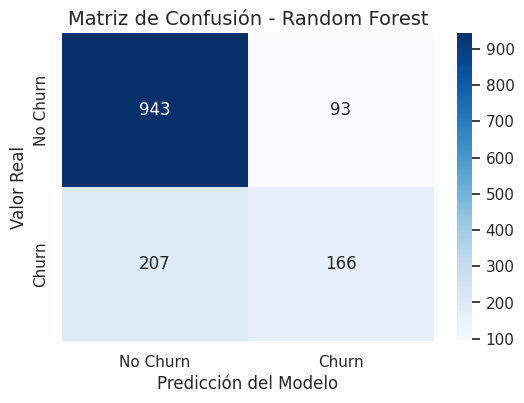

In [23]:
print("--- RENDIMIENTO: REGRESIÓN LOGÍSTICA ---")
print(classification_report(y_test, y_pred_log))
print(f"ROC-AUC Score: {roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1]):.4f}\n")

# Dibujamos la Matriz de Confusión del Random Forest
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Random Forest', fontsize=14)
plt.ylabel('Valor Real')
plt.xlabel('Predicción del Modelo')
plt.show()
plt.show()